In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
df_cluster = pd.read_csv('df_cluster.csv')

In [ ]:
features = df_cluster.select_dtypes(include=['number'])

In [ ]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3016 entries, 0 to 3015
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   amount_in_cr  3016 non-null   float64
dtypes: float64(1)
memory usage: 23.7 KB


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(scaled_features)

In [ ]:
cluster_summary = df_cluster.groupby('Cluster').median(numeric_only=True).reset_index()
print(cluster_summary)

   Cluster  amount_in_cr
0        0         55.25
1        1      27200.00
2        2      11900.00
3        3       4250.00
4        4       1177.25


/tmp/ipython-input-1958167007.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='amount_in_cr', data=cluster_summary, palette='viridis')


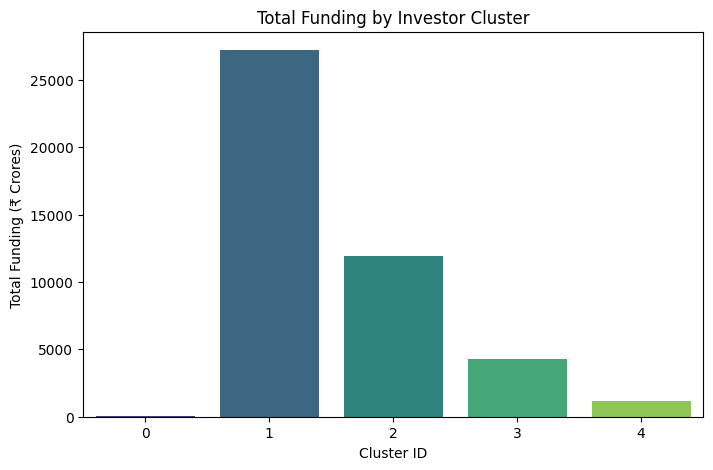

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x='Cluster', y='amount_in_cr', data=cluster_summary, palette='viridis')

plt.title('Total Funding by Investor Cluster')
plt.xlabel('Cluster ID')
plt.ylabel('Total Funding (₹ Crores)')
plt.show()
